In [8]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [9]:
df_p = pd.read_csv("data/Fey/LKB_P.csv")
df_pp = pd.read_csv("data/Fey/LKB_PP.csv")
df_c = pd.read_csv("data/Fey/LKB_C.csv")

In [10]:
# find common descriptors:

dict_change_pp = {'Bidentate Phosphine Ligand': 'Ligand',
                  'EHOMO_P1': 'EHOMO',
                  'ELUMO_P1': 'ELUMO',
                  'PA_P1':'PA',
                  'BE(Pd)': 'BE (Pd)',
                  'Pd-Cl': 'Pd-Cl trans',
                  'Q(Pd)': 'Q(Pd fragm.)'}

dict_change_c = {'Carbene Ligand': 'Ligand',
                 'EHOMO(s)': 'EHOMO',
                  'ELUMO(s)': 'ELUMO',}

dict_change_p = {'Phosphine Ligand': 'Ligand'}

# descripteurs phosphines
d_p = df_p.columns
new_d_p = d_p.to_list()
new_d_p[0] = 'Ligand'

# descripteurs diphosphines
d_pp = df_pp.columns
new_d_pp = []

for i in d_pp:
    if i in dict_change_pp:
        new_d_pp.append(dict_change_pp[i])
    else:
        new_d_pp.append(i)

# descripteurs carbenes
d_c = df_c.columns
new_d_c = []

for i in d_c:
    if i in dict_change_c:
        new_d_c.append(dict_change_c[i])
    else:
        new_d_c.append(i)


common_d = []        
# descripteurs partagés
for prop in new_d_p:
    if prop in new_d_pp:
        if prop in new_d_c:
            print(prop)
            common_d.append(prop)
        
df_p.columns = new_d_p
df_c.columns = new_d_c
df_pp.columns = new_d_pp

Ligand
EHOMO
ELUMO
PA
Q(Pd fragm.)
BE (Pd)
Pd-Cl trans


In [11]:
common_d_p = df_p[common_d]
common_d_p['type'] = ['Phosphine' for i in range(len(common_d_p))]
common_d_pp = df_pp[common_d]
common_d_pp['type'] = ['DiPhosphine' for i in range(len(common_d_pp))]
common_d_c = df_c[common_d]
common_d_c['type'] = ['Carbène' for i in range(len(common_d_c))]

/var/folders/c8/7pbzw0r912n01vr9fgdmzhx00000gn/T/ipykernel_46302/32109272.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  common_d_p['type'] = ['Phosphine' for i in range(len(common_d_p))]
/var/folders/c8/7pbzw0r912n01vr9fgdmzhx00000gn/T/ipykernel_46302/32109272.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  common_d_pp['type'] = ['DiPhosphine' for i in range(len(common_d_pp))]
/var/folders/c8/7pbzw0r912n01vr9fgdmzhx00000gn/T/ipykernel_46302/32109272.py:6: SettingWithCopyWarning: 
A value is trying

In [12]:
full_common = pd.concat([common_d_p,common_d_pp, common_d_c], axis= 0, ignore_index=True)

In [13]:
from sklearn.preprocessing import StandardScaler
common_d.remove('Ligand')
full_common[common_d]
scaler = StandardScaler()
full_common[common_d] = scaler.fit_transform(full_common[common_d])

/usr/local/anaconda3/envs/chem_rep/lib/python3.10/site-packages/sklearn/manifold/_t_sne.py:810: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  warnings.warn(
/usr/local/anaconda3/envs/chem_rep/lib/python3.10/site-packages/sklearn/manifold/_t_sne.py:996: FutureWarning: The PCA initialization in TSNE will change to have the standard deviation of PC1 equal to 1e-4 in 1.2. This will ensure better convergence.
  warnings.warn(


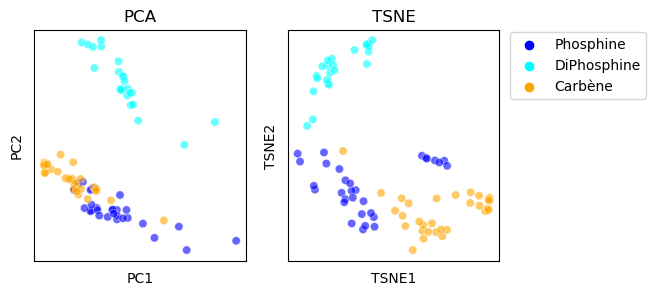

In [32]:
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
X = full_common[common_d].values
Y = full_common['type']
dict_colors = {'Phosphine': 'blue',
               'DiPhosphine': 'cyan',
               'Carbène': 'orange'}

colors = [dict_colors[i] for i in Y]
    
tsne = TSNE(init='pca')
tsne_X = tsne.fit_transform(X)

pca = PCA()
pca_X = pca.fit_transform(X)

fig, ax = plt.subplots(1,2, figsize=(6,3))

#ax[0].scatter(pca_X[:,0], pca_X[:,1], c = colors, label = 'Phosphine')
#ax[0].legend()
sns.scatterplot(x = pca_X[:,0], y=pca_X[:,1], 
                hue = Y.to_list(), palette=['blue', 'cyan', 'orange'], 
                ax = ax[0], alpha=0.6)

ax[0].get_legend().remove()
ax[0].set_xticks([])
ax[0].set_yticks([])
ax[0].set_xlabel("PC1")
ax[0].set_ylabel("PC2")
ax[0].set_title("PCA")


sns.scatterplot(x=tsne_X[:,0], y=tsne_X[:,1], 
                hue= Y.to_list(), palette=['blue', 'cyan', 'orange'], 
                ax= ax[1], alpha=0.6)

ax[1].legend(loc = [1.05,0.7]) 
ax[1].set_xticks([])
ax[1].set_yticks([])
ax[1].set_xlabel("TSNE1")
ax[1].set_ylabel("TSNE2")
ax[1].set_title("TSNE")

fig.savefig("figures/ligand_Fey_shared_descriptors.pdf", dpi=300, bbox_inches='tight')


<AxesSubplot: >

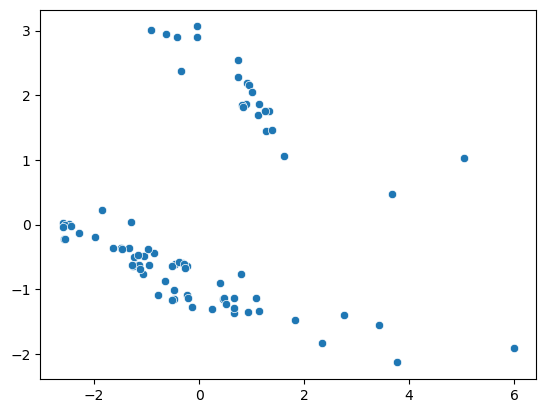

In [25]:
sns.scatterplot(x=pca_X[:,0], y=pca_X[:,1])